In [1]:

## 基础模型测试

## 语法正确率
'''

GLM4 9B
GEMMA 9B
LLAma 8B
Qwen7B  
四种模型  四种prompt 在领域迁移时候的效果

'''
import json
files = [
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/medical_LLama8B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_LLama8B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_LLama8B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_LLama8B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/medical_Qwen2.57B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_Qwen2.57B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_Qwen2.57B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_Qwen2.57B_train_vector_prompt.json_result.json",
]
import json

NP_data = []
SP_data = []
SVP_data = []
VP_data = []


for index,file in enumerate(files) :
    with open(file, 'r',encoding="utf-8") as json_file:
        GLM49B_train_normal_prompt = json.load(json_file)
    err_num = 0
    for row in   GLM49B_train_normal_prompt:
        if row['err'] == True:
            err_num = err_num+1

    print(f"{file}结果大小:{len(GLM49B_train_normal_prompt)}.错误个数:{err_num},语法正确率为{100-(err_num/908*100)}")
    if index % 4 == 0:
        NP_data.append(100-(err_num/len(GLM49B_train_normal_prompt)*100))
    if index % 4 == 1:
        SP_data.append(100-(err_num/len(GLM49B_train_normal_prompt)*100))
    if index % 4 == 2:
        SVP_data.append(100-(err_num/len(GLM49B_train_normal_prompt)*100))
    if index % 4 == 3:
        VP_data.append(100-(err_num/len(GLM49B_train_normal_prompt)*100))      


/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_normal_prompt.json_result.json结果大小:240.错误个数:227,语法正确率为75.0
/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_schema_prompt.json_result.json结果大小:240.错误个数:3,语法正确率为99.66960352422907
/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_schema_vector_prompt.json_result.json结果大小:240.错误个数:10,语法正确率为98.89867841409692
/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_vector_prompt.json_result.json结果大小:240.错误个数:145,语法正确率为84.03083700440529
/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_normal_prompt.json_result.json结果大小:240.错误个数:223,语法正确率为75.44052863436123
/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_schema_prompt.json_result.json结果大小:240.错误个数:27,语法正确率为97.02643171806167
/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_schema_vector_prompt.json_result.json结果大小:240.错误个数:18,语法正确率为98.01762114537445
/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_vector_prompt.json_result.json结果大小:240.错误个数:143,

In [2]:


### 语义正确率分析  精确率 召回率  行、列分别分析
import json


with open("/home/work/liuytest/大论文/4评估/ldbc_normal_test_7_3.json_result.json", 'r',encoding="utf-8") as json_file:
    core_train_result = json.load(json_file)

files = [
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/medical_LLama8B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_LLama8B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_LLama8B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_LLama8B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/medical_Qwen2.57B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_Qwen2.57B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_Qwen2.57B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/medical_Qwen2.57B_train_vector_prompt.json_result.json",
]

NP_data_recall = []
SP_data_recall = []
SVP_data_recall = []
VP_data_recall = []

NP_data_precision = []
SP_data_precision = []
SVP_data_precision = []
VP_data_precision = []

with open("/home/work/liuytest/大论文/4评估/medical_test_data_result.json", 'r',encoding="utf-8") as json_file:
    core_train_result = json.load(json_file)

print("对比结果的大小:",len(core_train_result))

for file_index,file in enumerate(files) :
    with open(file, 'r',encoding="utf-8") as json_file:
        GLM49B_train_normal_prompt = json.load(json_file)
    err_num = 0
    total_recall=0
    total_precision = 0
    for index,row in   enumerate(GLM49B_train_normal_prompt) :

        if row['err'] == True:
            err_num = err_num+1
            single_query_recall = 0
            single_query_precision = 0
        else:
            correct_row = core_train_result[index]
            if correct_row['output'] == row['output']:
                # print("bangbangbangbangbangbangbangbangbangbangbangbangbangbang")
                pass
            label_rows =  correct_row['rows']
            
            pred_rows = row['rows']
            
            len_total_row = len(label_rows)
            
            if len_total_row != len(pred_rows):
                single_query_recall = 0
                single_query_precision = 0
            else:
                recall=0
                precision = 0
                for index,label_row in  enumerate(label_rows):
                    label_row = [str(data) for data in list(label_row)]
                    pred_colums_set = set(label_row)
                    pred_row = pred_rows[index]
                    pred_row = [str(data) for data in list(pred_row)]
                    label_colums_set = set(pred_row)
                    intersection = pred_colums_set.intersection(label_colums_set)
                    if len(intersection) == len(label_colums_set):
                        # print("colum bangbangbang")
                        pass
                    ### 列的语义分析准确率     回收率
                    recall =  recall+ len(intersection)/len(label_colums_set) *100  
                    ### 列的语义分析准确率     精确率
                    precision = precision + len(intersection)/len(pred_colums_set) *100 
                single_query_recall = recall/len_total_row
                single_query_precision = precision/len_total_row 
        total_recall = total_recall + single_query_recall
        total_precision = total_precision + single_query_precision
    total_recall = total_recall/len(GLM49B_train_normal_prompt)
    total_precision= total_precision/len(GLM49B_train_normal_prompt)                                        
    print(f"{file}的语义回收率为{total_recall}，语义精确率为{total_precision}")        
    if file_index % 4 == 0:
        NP_data_recall.append(total_recall)
        NP_data_precision.append(total_precision)
    if file_index % 4 == 1:
        SP_data_recall.append(total_recall)
        SP_data_precision.append(total_precision)
    if file_index % 4 == 2:
        SVP_data_recall.append(total_recall)
        SVP_data_precision.append(total_precision)
    if file_index % 4 == 3:
        VP_data_recall.append(total_recall)
        VP_data_precision.append(total_precision)               
                
   

            



对比结果的大小: 240
/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_normal_prompt.json_result.json的语义回收率为1.25，语义精确率为1.25
/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_schema_prompt.json_result.json的语义回收率为51.97007517945019，语义精确率为52.484855248917754
/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_schema_vector_prompt.json_result.json的语义回收率为71.70773836797734，语义精确率为71.87999186157889
/home/work/liuytest/大论文/4评估/1数据预处理/medical_gemma9B_train_vector_prompt.json_result.json的语义回收率为37.5，语义精确率为37.1875
/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_normal_prompt.json_result.json的语义回收率为0.4166666666666667，语义精确率为0.4166666666666667
/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_schema_prompt.json_result.json的语义回收率为37.82068602693603，语义精确率为37.84847883597884
/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_schema_vector_prompt.json_result.json的语义回收率为60.50441225441225，语义精确率为60.80220682095682
/home/work/liuytest/大论文/4评估/1数据预处理/medical_GLM49B_train_vector_prompt.

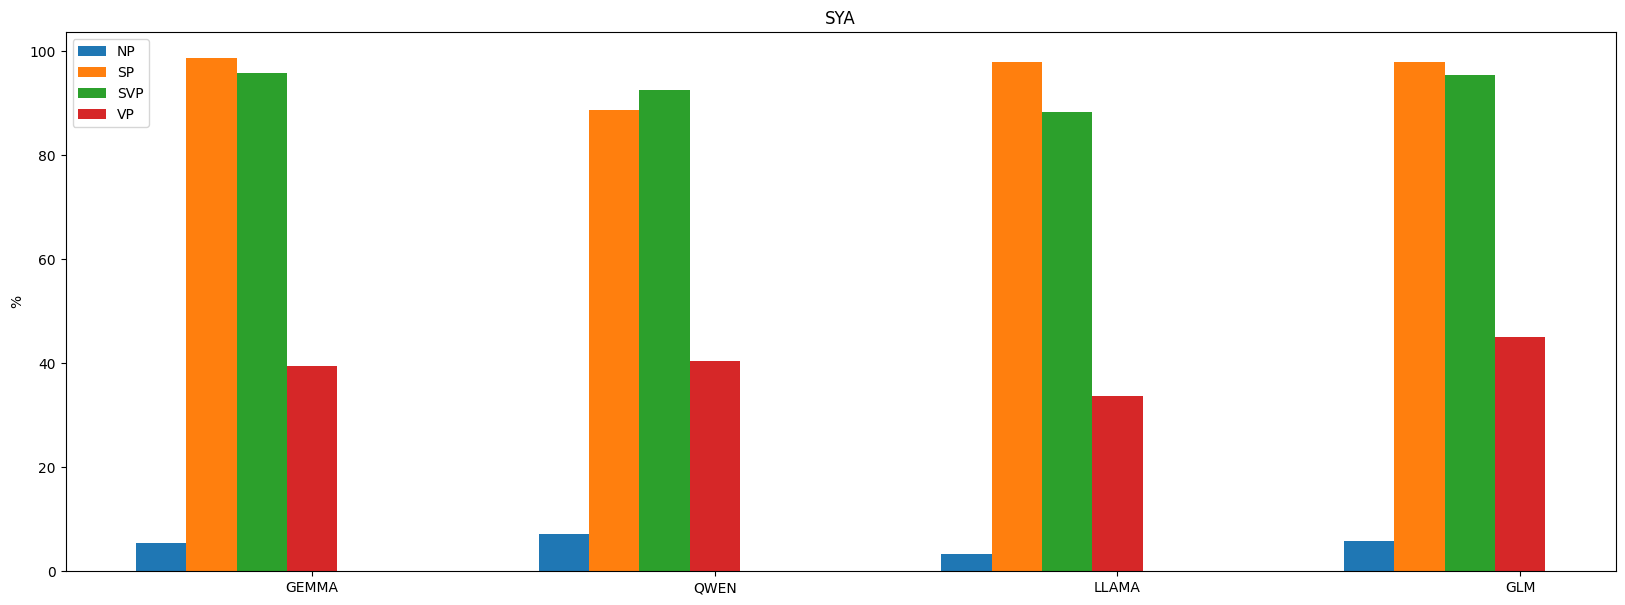

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


species = ['GEMMA','QWEN','LLAMA','GLM']
penguin_means = {
    'NP':NP_data,
    'SP':SP_data,
    'SVP': SVP_data,
    'VP':VP_data,
}

x = np.arange(0,len(species)*2,step=2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(20, 7))


index_plot = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    if index_plot%2==0:
        multiplier = multiplier
        x_bar =x +   offset
    else:
        x_bar = x + offset
    index_plot= index_plot+1   
    rects = ax.bar(x_bar, measurement, width, label=attribute)
    
    for i, val in enumerate(measurement):
        if val == 0:
            ax.bar(x_bar[i], 100,width,hatch='/',color= rects[i].get_facecolor())  # 在柱状图上添加文本标记
    
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('SYA')
ax.set_xticks(x + width*3, species)
ax.legend(loc='upper left', ncols=1)

plt.show()

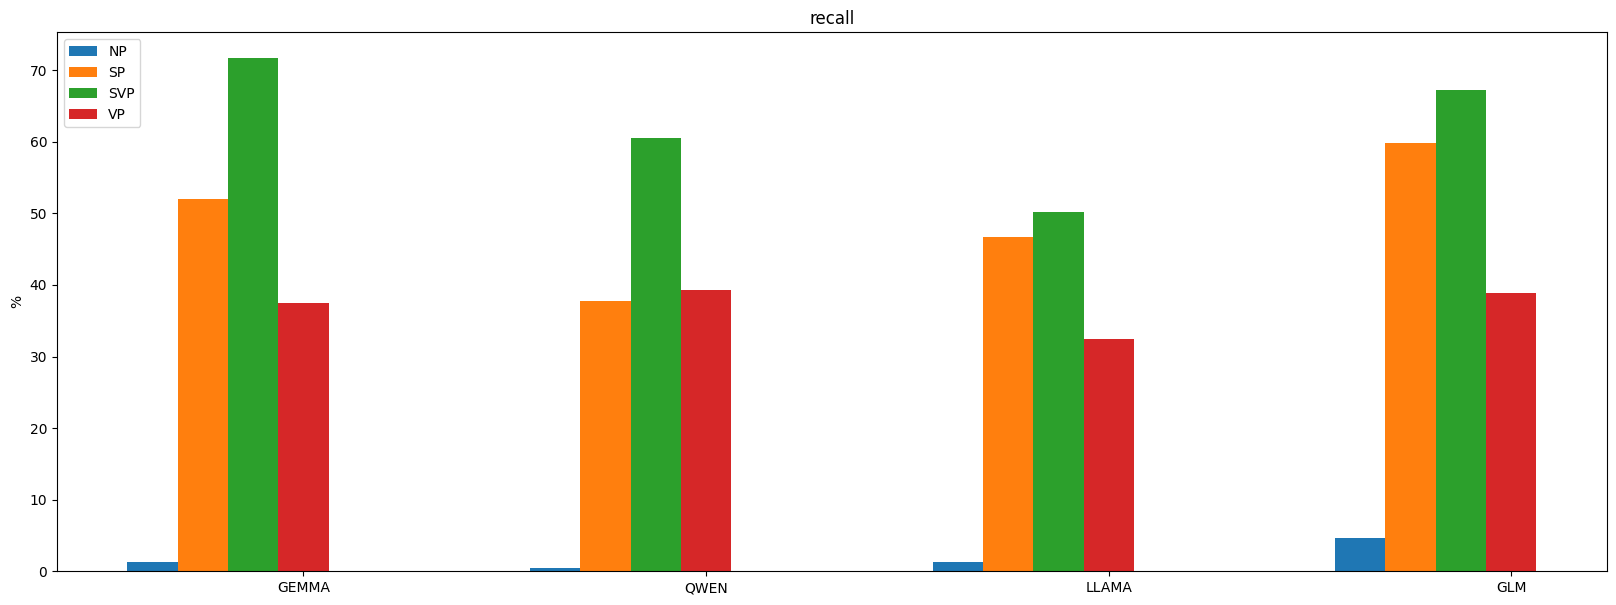

In [7]:
## 语义正确率柱状图分析

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


species = ['GEMMA','QWEN','LLAMA','GLM']
penguin_means = {
    'NP':NP_data_recall,
    'SP':SP_data_recall,
    'SVP': SVP_data_recall,
    'VP':VP_data_recall,
}

x = np.arange(0,len(species)*2,step=2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(20, 7))


index_plot = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    if index_plot%2==0:
        multiplier = multiplier
        x_bar =x +   offset
    else:
        x_bar = x + offset
    index_plot= index_plot+1   
    rects = ax.bar(x_bar, measurement, width, label=attribute)
    
    for i, val in enumerate(measurement):
        if val == 0:
            ax.bar(x_bar[i], 100,width,hatch='/',color= rects[i].get_facecolor())  # 在柱状图上添加文本标记
    
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('recall')
ax.set_xticks(x + width*3, species)
ax.legend(loc='upper left', ncols=1)

plt.show()

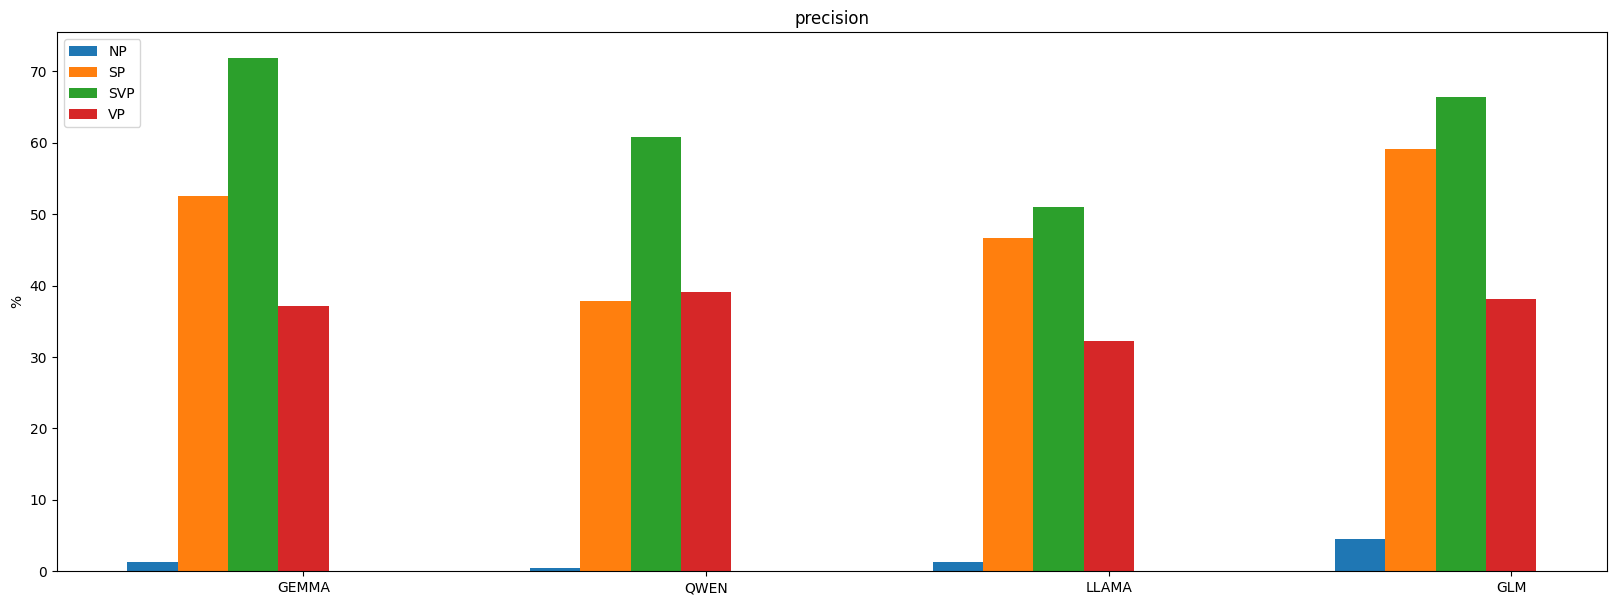

In [8]:
## 语义正确率柱状图分析

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


species = ['GEMMA','QWEN','LLAMA','GLM']
penguin_means = {
    'NP':NP_data_precision,
    'SP':SP_data_precision,
    'SVP': SVP_data_precision,
    'VP':VP_data_precision,
}

x = np.arange(0,len(species)*2,step=2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(20, 7))


index_plot = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    if index_plot%2==0:
        multiplier = multiplier
        x_bar =x +   offset
    else:
        x_bar = x + offset
    index_plot= index_plot+1   
    rects = ax.bar(x_bar, measurement, width, label=attribute)
    
    for i, val in enumerate(measurement):
        if val == 0:
            ax.bar(x_bar[i], 100,width,hatch='/',color= rects[i].get_facecolor())  # 在柱状图上添加文本标记
    
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('precision')
ax.set_xticks(x + width*3, species)
ax.legend(loc='upper left', ncols=1)

plt.show()